# Assignment #2

Please follow instruction below to complete your assignment. 
You are expected to provide:
- IPython notebook
- HTML export of this notebook

This assignment is due 20/05/2022. Please use code blocks to comment and explain your code.

STUDENT ID: [26754]

In [ ]:
%matplotlib inline 
import os, sys
import json

import random
import numpy as np
import networkx as nx
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt

# Import any other package you may need
from random import seed
from pylab import *
from scipy.ndimage import measurements

## Helper functions for data visualization

In [ ]:
def visualize_grid(grid, params=None, figname=None):
    '''
    Generic data visualization function
    
    - grid: 2D numpy array that has integer values
    - params: dictionary of parameters ex: {'dim': (50,50), 'p':0.5} 
    - figname: path and name for a figure file ex: figures/sample_05.pdf
    '''
    cmap = plt.cm.get_cmap('jet', len(np.unique(grid)))
    im = plt.matshow(grid, cmap=cmap, origin='lower', interpolation='none')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks([])
    plt.yticks([])
    
    if params != None:
        plt.title(params, fontsize=10)
    
    if figname != None:
        plt.savefig(figname, dpi=300, bbox_inches='tight')
    

## Simulate percolation

Percolation from left to right


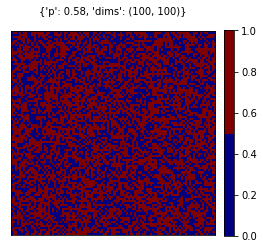

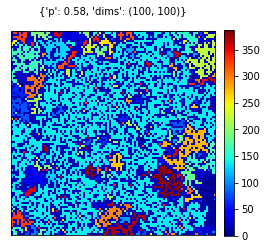

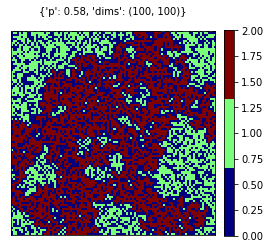

In [ ]:
def create_grid(dimensions, pthr):
    '''
    Create a grid as 2D numpy array and return the grid
    - dimensions: tuple or array that has height and width of the grid ex: [50,50]
    - pthr: threshold value for occupying a cell
    '''
    grid = np.zeros(dimensions)

    # FILL HERE
    for i in range(0,dimensions[0]):
      for j in range(0,dimensions[1]):
        if random() < pthr:
          grid[j][i] = 1
    
    return grid

def find_clusters(grid):
    '''
    Find clusters of occupied cells in the grid
    - grid: 2D numpy array
    
    Return:
    - cGrids: 2D numpy array that has a different integer values for each cluster cells
    - clusters: list of coordinates for each cluster
    '''
    clusters = list()
    cGrids = np.zeros(grid.shape)    
    # FILL HERE
    
    #From the scipy.ndimage library, which is mainly used for image processing, I imported 
          #measurements.label function in order to label Connected Components (CCL) which are clusters in this case
    
    #Here, a is the labeled grid and b is the number of different classes
    a, b = measurements.label(grid)
    cGrids = a
    
    #In order to present classes more obviously, I shuffeled the color schema
    tmp = arange(a.max() + 1)
    shuffle(tmp)
    cGrids = tmp[a]

    #For all different labels (clusters), a list of points that the class included is created
    for i in range(b+1):
      coord_x, coord_y = np.where(cGrids == i)
      try_x = int(coord_x[0])
      try_y = int(coord_y[0])
      if grid[try_x][try_y] != 0: #For indices that has value 0, no class has been assigned
        coordinates = list()
        for j in range(len(coord_x)):
          coordinate = (int(coord_x[j]), int(coord_y[j]))
          coordinates.append(coordinate)
        clusters.append(coordinates)

    
    return cGrids, sorted(clusters, key=len)


def check_percolation(grid, clusters):
    '''
    Check whether given grid percolated
    - grid: 2D numpy array
    
    Return:
    - grid: 2D numpy array. This function updated the value of grid to reflect percolating component
    - percCluster: coordinates of the cells in the percolating component
    '''
    clusters = sorted(clusters, key=len)
    percCluster = None
    
    # FILL HERE
    
    #In order to detect the percolation, one can simply check following conditions
        #In a cluster if there exist two points such as:
        #(1) One of them has x_value = 0 and other has x_value = maxValue - 1
        #(2) One of them has y_value = 0 and other has y_value = maxValue - 1
    boundaries = grid.shape
    for label in clusters:
      column = sorted(label, key=lambda x: x[1])
      row = sorted(label, key=lambda x: x[0])

      #Check condition (1) here
      if column[0][1] == 0 and column[-1][1] == boundaries[1]-1:
        print("Percolation from left to right")
        percCluster = label
        break
      #Check condition (2) here
      elif row[0][0] == 0 and row[-1][0] == boundaries[1]-1:
        print("Percolation from up to bottom")
        percCluster = label
        break
    #Detected cluster that is percolated will be labeled as 2 here and it will show the percolated area
    if percCluster != None:
      for c in percCluster:
        grid[c[0],c[1]] = 2
            
    return grid, percCluster

pval = 0.58
dims = (100,100)
rgrid = create_grid(dims, pval)
visualize_grid(rgrid, {'p':pval, 'dims':dims})

cgrid, clusters = find_clusters(rgrid)
visualize_grid(cgrid, {'p':pval, 'dims':dims})


pgrid, pcluster = check_percolation(rgrid, clusters)
visualize_grid(pgrid, {'p':pval, 'dims':dims})


{'p': 0.01, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.02, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.03, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.04, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.05, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.06, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.07, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.08, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.09, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.1, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.11, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.12, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.13, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.14, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.15, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.16, 'idx': 0, 'dim': (100, 100), 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.21, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.22, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.23, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.24, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.25, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.26, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.27, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.28, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.29, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.3, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.31, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.32, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.33, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.34, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.35000000000000003, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.36, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.37, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.38, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.39, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.4, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.41000000000000003, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.42, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.43, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.44, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.45, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.46, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.47000000000000003, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.48, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.49, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.51, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.52, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.53, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.54, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.55, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.56, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5700000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
Percolation from up to bottom


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.58, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from up to bottom


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.59, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.61, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.62, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.63, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.64, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.65, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.66, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.67, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.68, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6900000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.7000000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.71, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.72, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.73, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.74, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.75, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.76, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.77, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.78, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.79, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.8, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.81, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.8200000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.8300000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.84, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.85, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.86, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.87, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.88, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.89, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.9, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.91, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.92, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.93, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.9400000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.9500000000000001, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.96, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.97, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.98, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


Streaming output truncated to the last 5000 lines.
{'p': 0.48, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.49, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.51, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.52, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.53, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.54, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.55, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.56, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
Percolation from up to bottom
{'p': 0.5700000000000001, 'idx': 64, 'dim': (100, 100), 'isPercolated': True}
{'p': 0.58, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.59, 'idx': 64, 'dim': (100, 100), 'isPercolated': False}
Percolation from left to right
{'p': 0.6, 'idx': 64, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right
{'

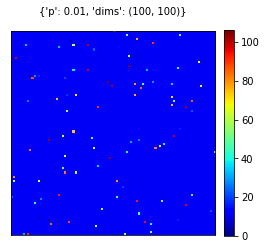

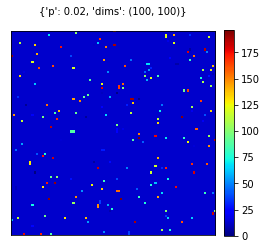

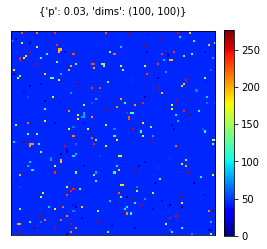

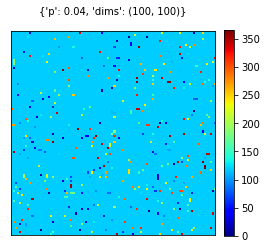

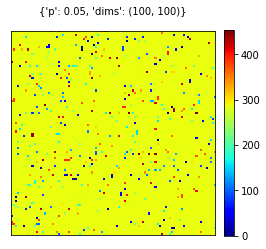

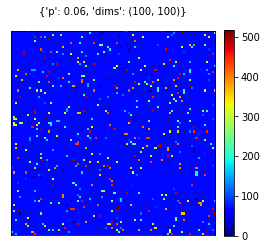

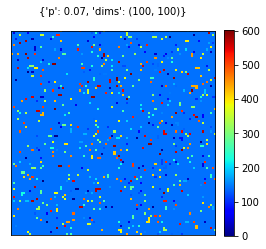

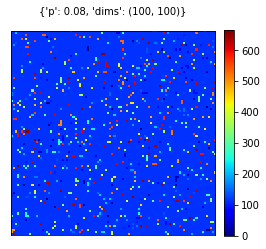

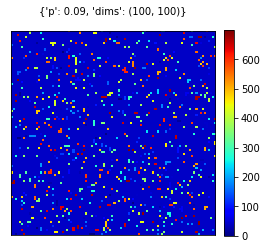

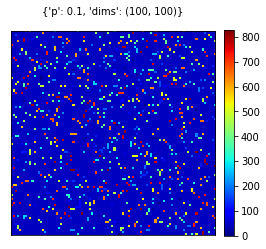

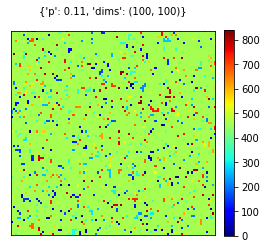

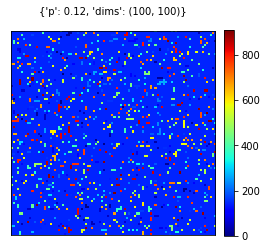

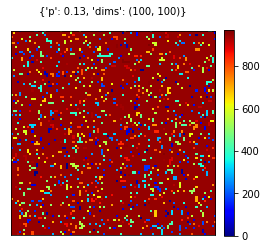

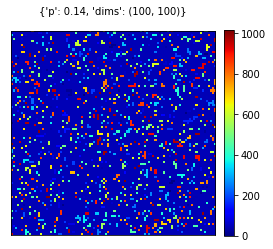

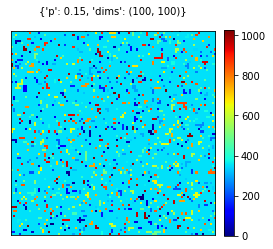

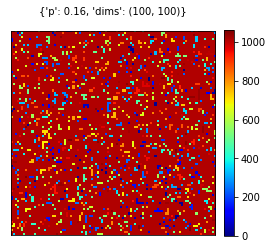

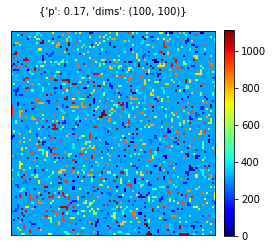

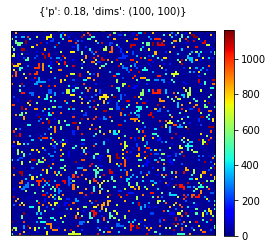

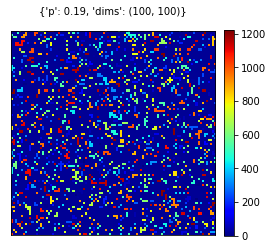

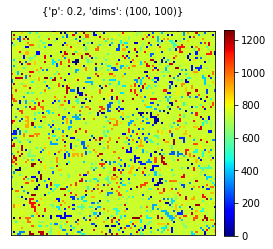

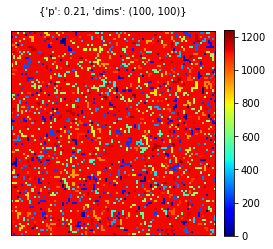

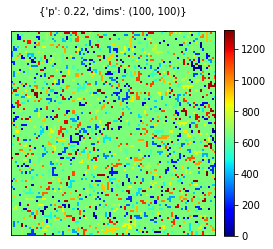

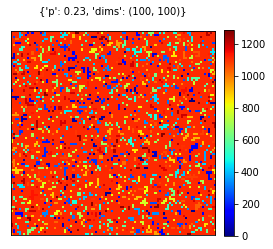

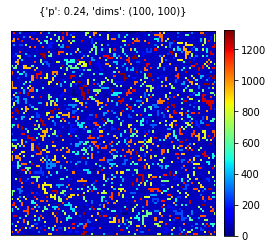

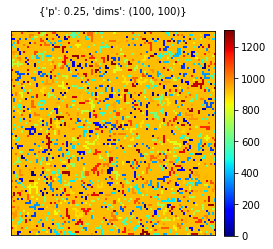

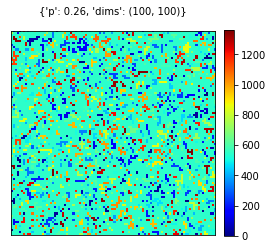

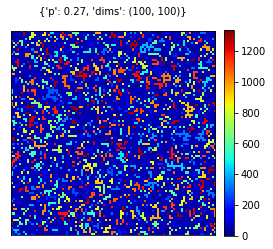

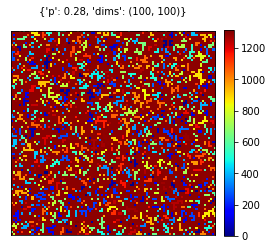

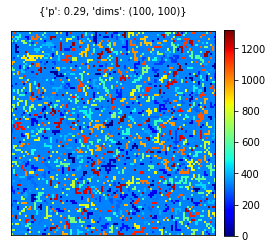

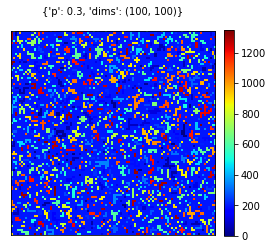

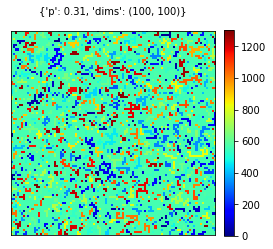

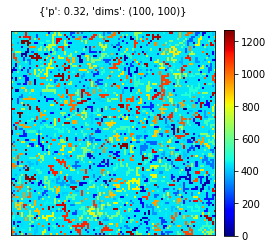

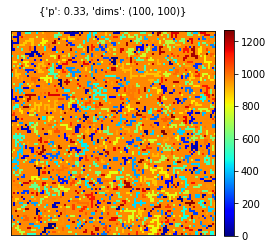

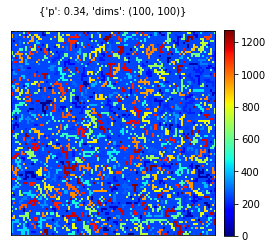

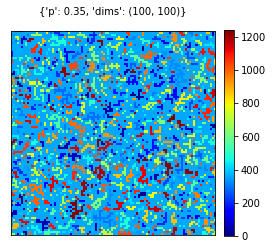

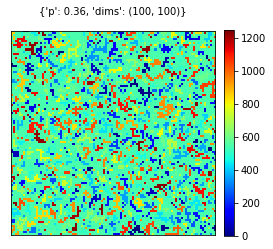

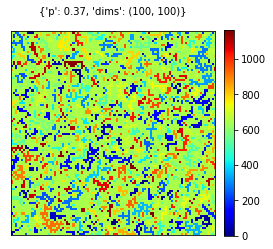

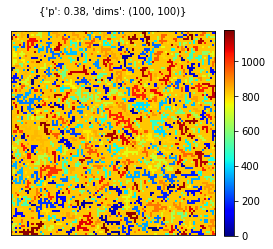

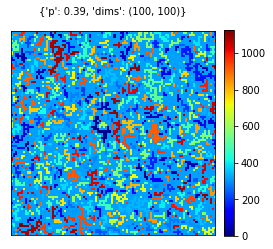

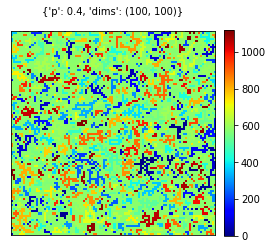

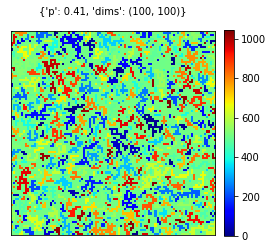

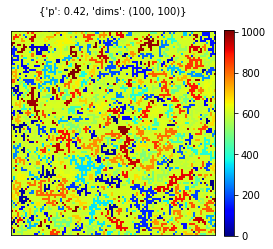

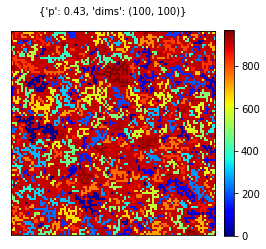

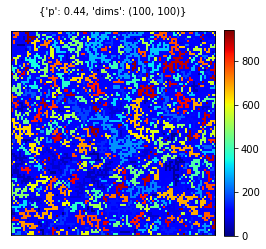

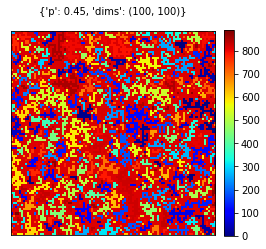

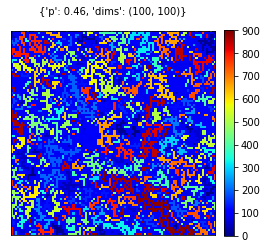

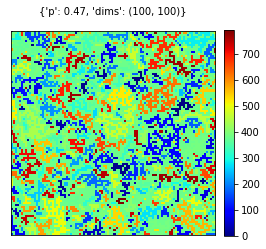

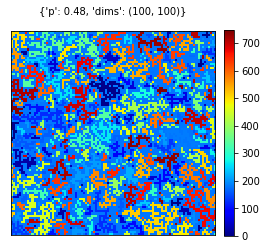

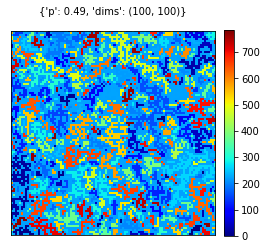

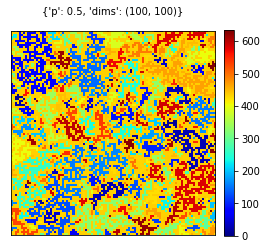

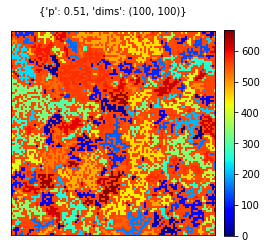

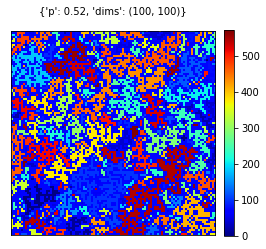

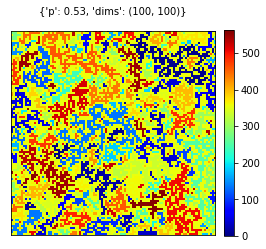

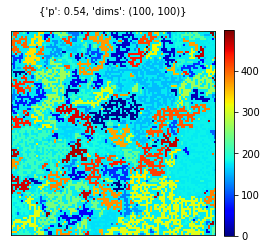

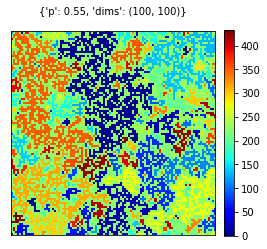

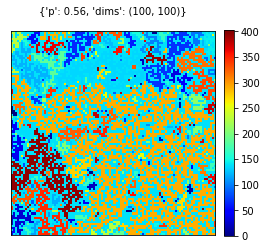

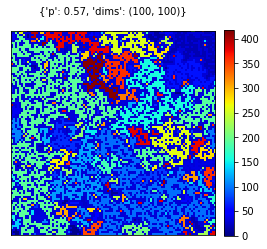

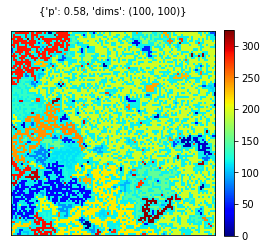

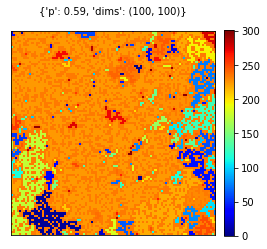

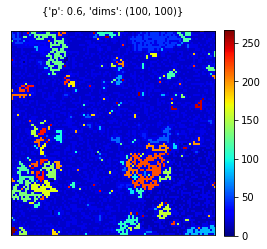

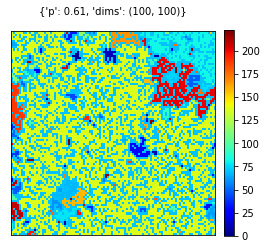

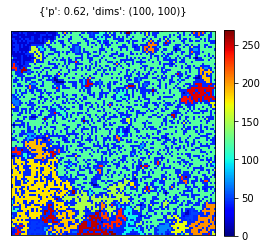

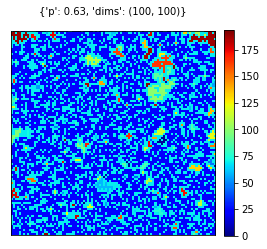

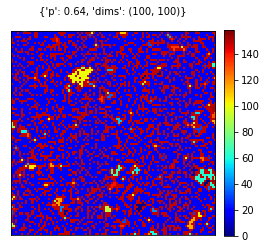

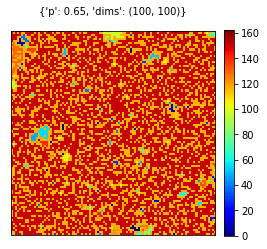

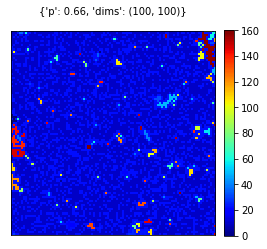

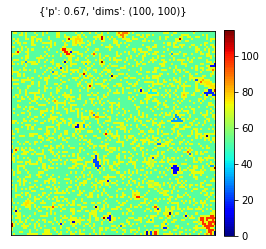

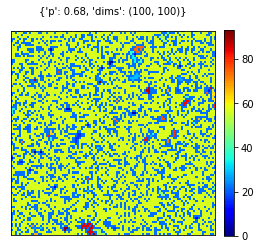

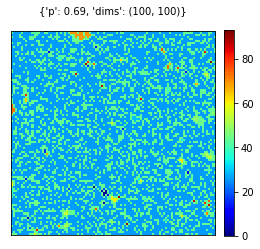

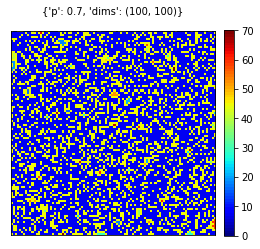

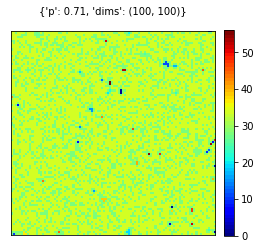

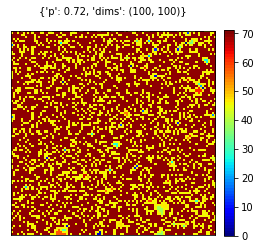

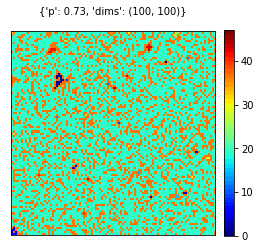

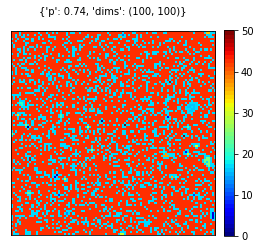

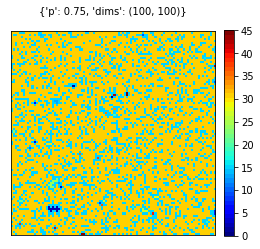

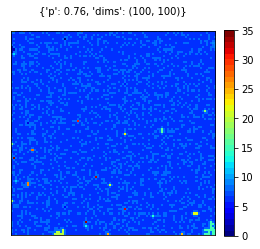

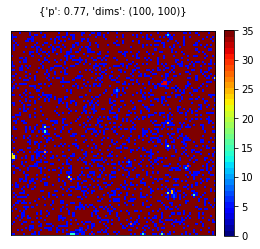

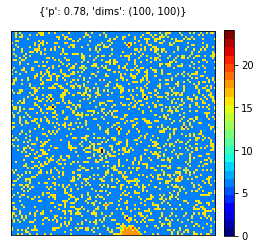

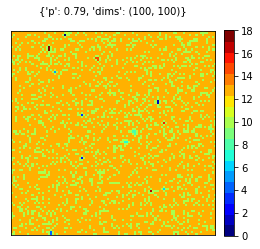

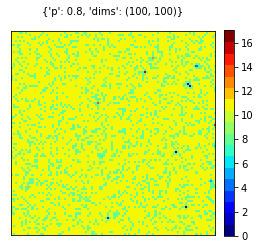

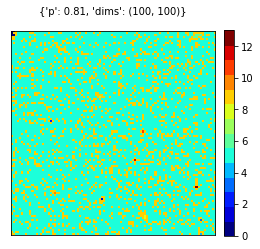

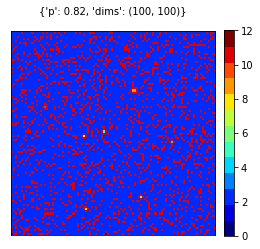

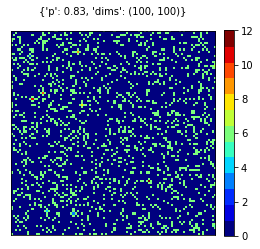

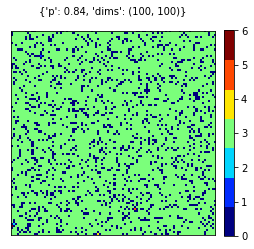

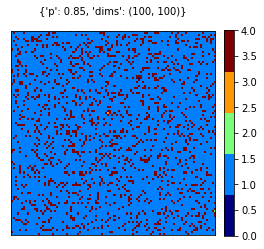

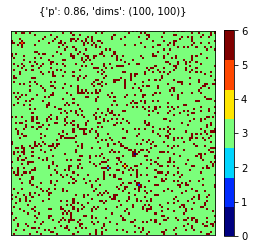

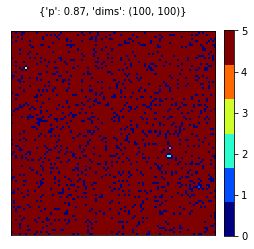

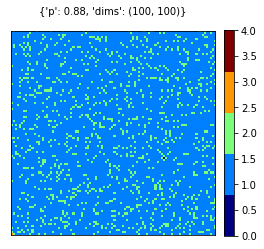

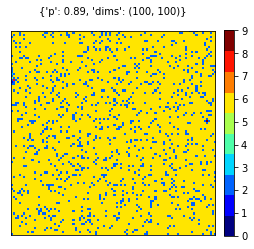

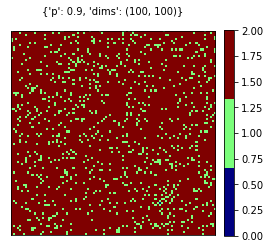

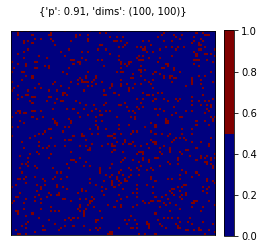

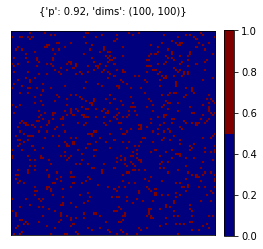

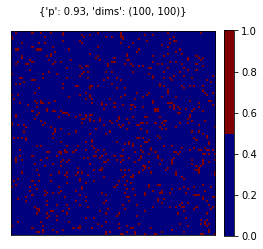

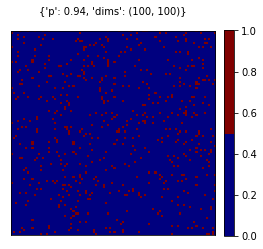

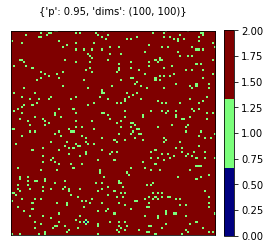

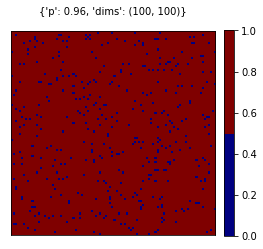

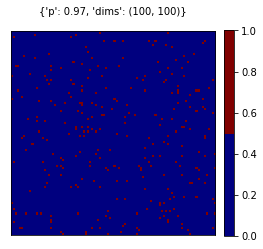

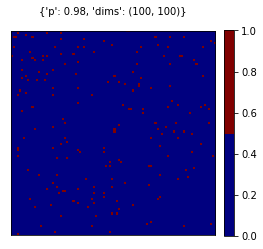

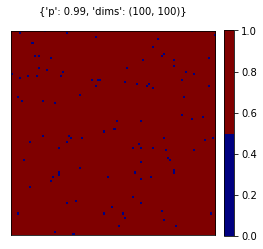

In [ ]:
#pExplore

# You can change the parameters below.
NRANDOM = 100
DIMS = (50,50)

pExplore = np.linspace(0,1,101)[1:-1]

expResults = list()
for n in range(NRANDOM):
    
    # You can run simulation for pExplore and pExpand values seperately and repeat pExpand if needed.
    for pval in pExplore:   
    #for pval in pExpand: 
        rgrid = create_grid(dims, pval)
        cgrid, clusters = find_clusters(rgrid)
        pgrid, pcluster = check_percolation(rgrid, clusters)
        
    
        if n == 0:
            # Sample one outcome for each parameter
            visualize_grid(cgrid, {'p':np.round(pval,4), 'dims':dims}, 
                           figname='percolation-figures-explore/percvis_p{:.4f}.pdf'.format(pval))
        
        # I recommend keeping all the experiment results in a file, 
        # so that you will have them all before your analysis
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': dims,
            'isPercolated': pcluster != None,
            'clusters': clusters,
        })
        
        print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('percolation_experiments_explore.jsons', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))
        


In [ ]:
!zip -r /content/percolation-explore.zip /content/percolation-figures-explore

In [ ]:
from google.colab import files
files.download("/content/percolation-explore.zip")

{'p': 0.5029411764705882, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5058823529411764, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5088235294117647, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5117647058823529, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5147058823529411, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5176470588235295, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5205882352941177, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5235294117647059, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5264705882352941, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5294117647058824, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5323529411764706, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5352941176470588, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.538235294117647, 'idx': 0, 'dim': (100, 100), 'isPercola

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5617647058823529, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5647058823529412, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5676470588235294, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5705882352941176, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5735294117647058, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5764705882352941, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5794117647058824, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5823529411764706, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5852941176470589, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5882352941176471, 'idx': 0, 'dim': (100, 100), 'isPercolated': False}
Percolation from up to bottom


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5911764705882353, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5941176470588235, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.5970588235294118, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6029411764705882, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6058823529411765, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6088235294117648, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.611764705882353, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6147058823529412, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6176470588235294, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6205882352941177, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6235294117647059, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6264705882352941, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6294117647058823, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6323529411764706, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6352941176470588, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.638235294117647, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6411764705882353, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6441176470588236, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.6470588235294118, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
Percolation from left to right


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


{'p': 0.65, 'idx': 0, 'dim': (100, 100), 'isPercolated': True}
{'p': 0.5029411764705882, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5058823529411764, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5088235294117647, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5117647058823529, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5147058823529411, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5176470588235295, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5205882352941177, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5235294117647059, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5264705882352941, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5294117647058824, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5323529411764706, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{'p': 0.5352941176470588, 'idx': 1, 'dim': (100, 100), 'isPercolated': False}
{

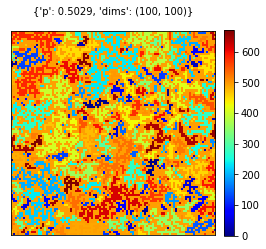

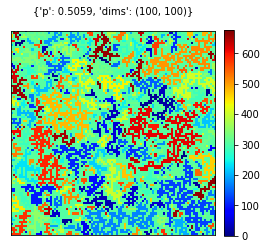

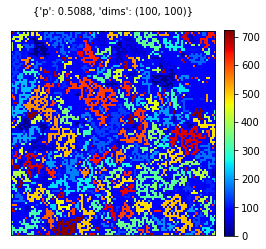

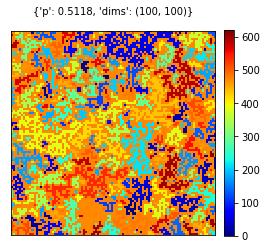

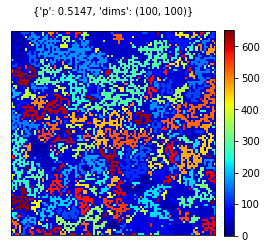

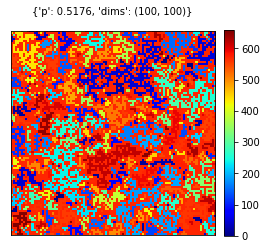

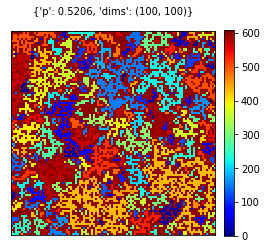

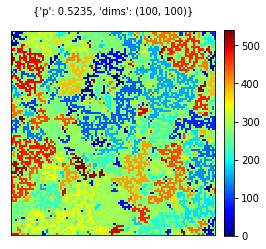

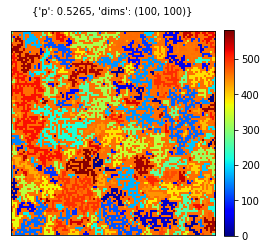

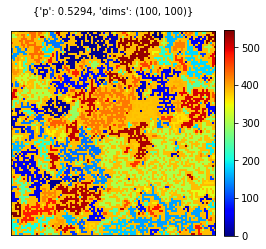

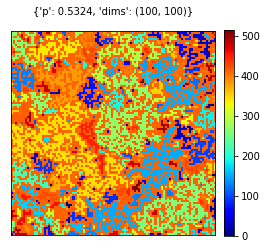

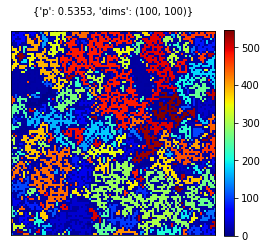

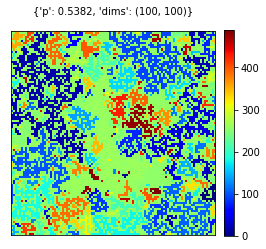

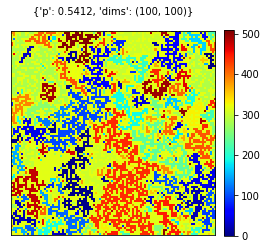

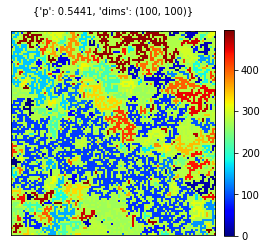

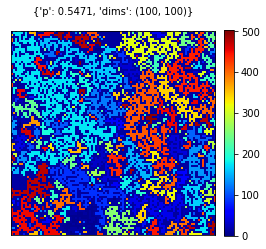

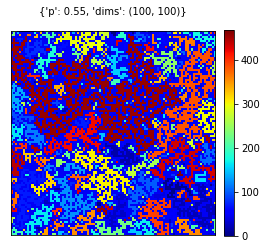

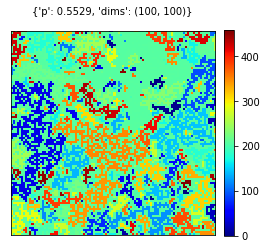

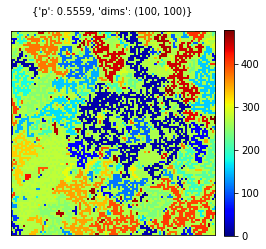

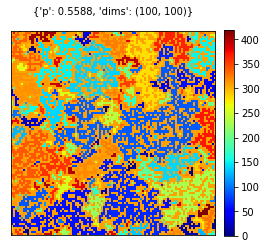

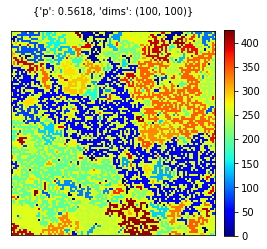

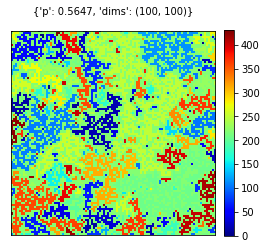

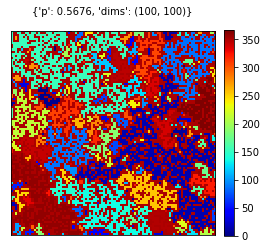

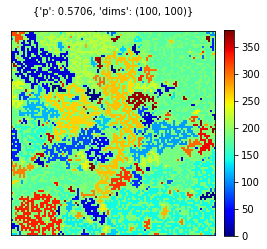

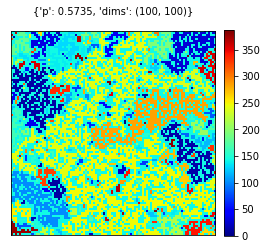

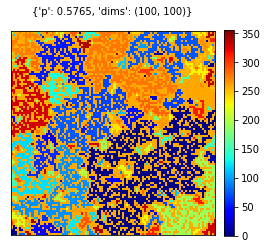

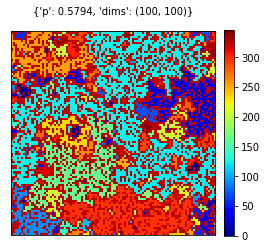

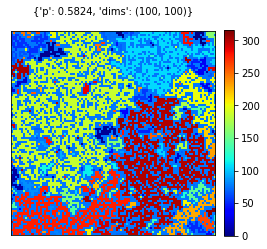

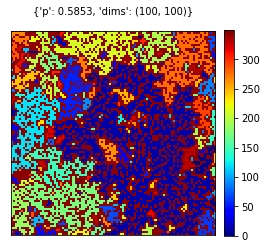

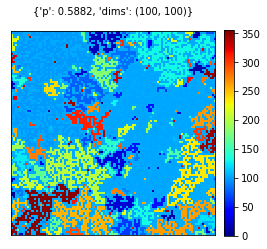

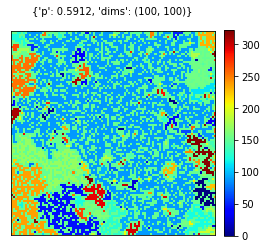

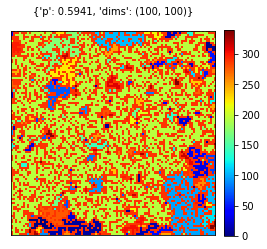

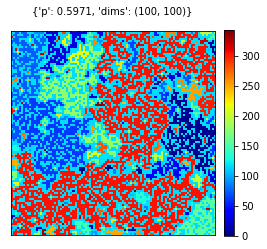

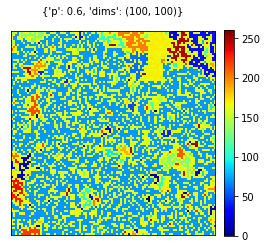

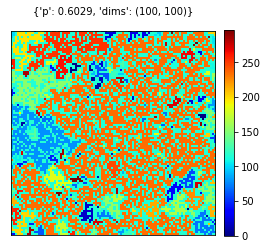

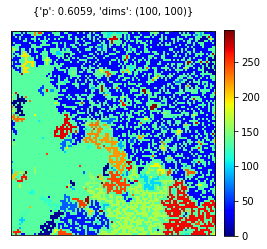

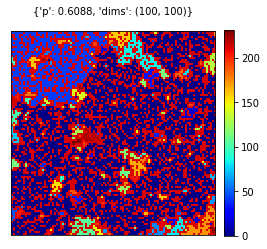

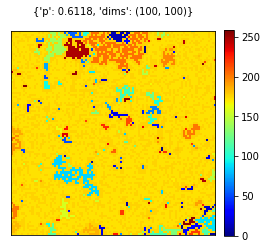

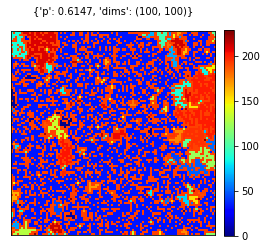

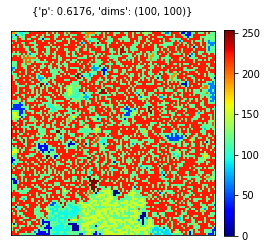

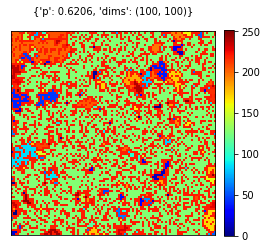

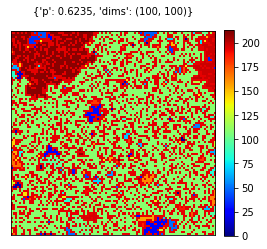

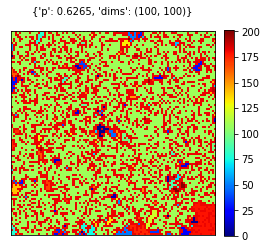

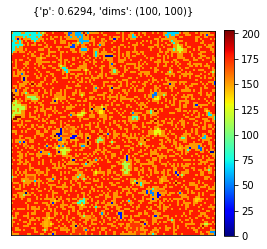

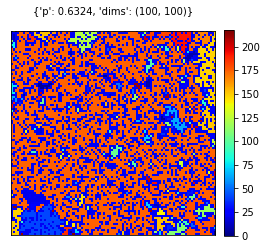

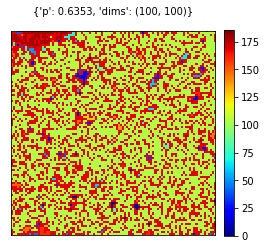

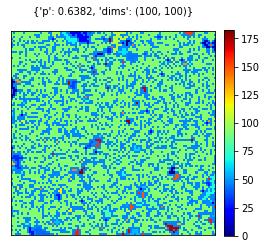

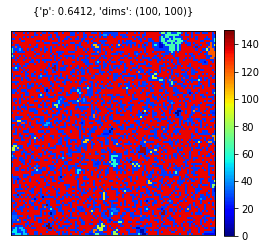

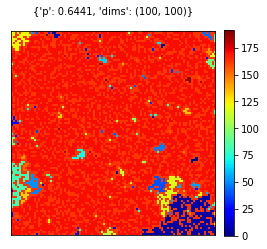

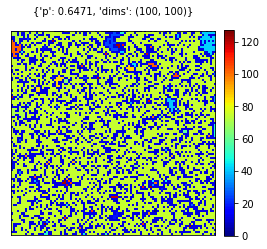

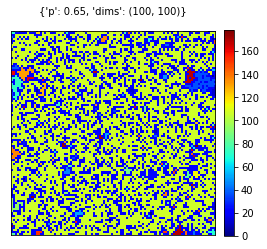

In [ ]:
#pExpand

NRANDOM = 50
DIMS = (50,50)
pExpand = np.linspace(0.5,0.65,52)[1:] # Update this array to find more accurate estimation.

expResults = list()
for n in range(NRANDOM):
    
    # You can run simulation for pExplore and pExpand values seperately and repeat pExpand if needed.
    #for pval in pExplore:   
    for pval in pExpand: 
        rgrid = create_grid(dims, pval)
        cgrid, clusters = find_clusters(rgrid)
        pgrid, pcluster = check_percolation(rgrid, clusters)
        
    
        if n == 0:
          visualize_grid(cgrid, {'p':np.round(pval,4), 'dims':dims}, 
                           figname='percolation-figures-expand/percvis_p{:.4f}.pdf'.format(pval))
        expResults.append({
            'p': pval,
            'idx': n,
            'dim': dims,
            'isPercolated': pcluster != None,
            'clusters': clusters,
        })
        
        print({k:v for k,v in expResults[-1].items() if k != 'clusters'})
        
        # Let's keep the latest experiment result on a file
        with open('percolation_experiments_expand.jsons', 'a') as fl:
            fl.write('{}\n'.format(json.dumps(expResults[-1])))
        


In [ ]:
!zip -r /content/percolation-expand.zip /content/percolation-figures-expand

In [ ]:
files.download("/content/percolation-expand.zip")

## Analyze outputs

In [ ]:
#pExplore
expRes = dict()
with open('percolation_experiments_explore.jsons', 'r') as fl:
    for i,line in enumerate(fl):
        expRes[i] = json.loads(line.strip())
exploreDf = pd.DataFrame.from_dict(expRes, orient='index')

In [ ]:
#pExpand
expRes = dict()
with open('percolation_experiments_expand.jsons', 'r') as fl:
    for i,line in enumerate(fl):
        expRes[i] = json.loads(line.strip())
expandDf = pd.DataFrame.from_dict(expRes, orient='index')

In [ ]:
exploreDf

,p,idx,dim,isPercolated,clusters
0,0.01,0,"[100, 100]",False,"[[[7, 18]], [[77, 9]], [[94, 29]], [[94, 35]],..."
1,0.02,0,"[100, 100]",False,"[[[30, 11]], [[69, 51]], [[66, 62]], [[63, 7]]..."
2,0.03,0,"[100, 100]",False,"[[[14, 77]], [[39, 24]], [[13, 31]], [[65, 16]..."
3,0.04,0,"[100, 100]",False,"[[[96, 57]], [[54, 72]], [[60, 89]], [[11, 67]..."
4,0.05,0,"[100, 100]",False,"[[[94, 56]], [[92, 40]], [[4, 72]], [[59, 76]]..."
...,...,...,...,...,...
9895,0.95,99,"[100, 100]",True,"[[[0, 0], [0, 1], [0, 3], [0, 4], [0, 5], [0, ..."
9896,0.96,99,"[100, 100]",True,"[[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, ..."
9897,0.97,99,"[100, 100]",True,"[[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, ..."
9898,0.98,99,"[100, 100]",True,"[[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, ..."


In [ ]:
expandDf

,p,idx,dim,isPercolated,clusters
0,0.502941,0,"[100, 100]",False,"[[[36, 0]], [[27, 18]], [[75, 95]], [[35, 83]]..."
1,0.505882,0,"[100, 100]",False,"[[[29, 28]], [[97, 4]], [[93, 88]], [[87, 35]]..."
2,0.508824,0,"[100, 100]",False,"[[[54, 35]], [[19, 75]], [[27, 75]], [[27, 77]..."
3,0.511765,0,"[100, 100]",False,"[[[1, 63]], [[89, 41]], [[94, 27]], [[54, 71]]..."
4,0.514706,0,"[100, 100]",False,"[[[11, 97]], [[88, 48]], [[56, 72]], [[22, 98]..."
...,...,...,...,...,...
2545,0.638235,49,"[100, 100]",True,"[[[31, 73]], [[90, 77]], [[39, 72]], [[52, 0]]..."
2546,0.641176,49,"[100, 100]",True,"[[[88, 15]], [[24, 94]], [[37, 42]], [[65, 35]..."
2547,0.644118,49,"[100, 100]",True,"[[[3, 49]], [[95, 37]], [[83, 79]], [[20, 36]]..."
2548,0.647059,49,"[100, 100]",True,"[[[13, 81]], [[11, 40]], [[19, 61]], [[66, 10]..."


In [ ]:
#Probabilities and Average Cluster size

#pExplore
perc_prob_explore = dict() 
for p in exploreDf.p.unique():
  p_df = exploreDf[exploreDf.p == p]
  percolated_count = len(p_df[p_df.isPercolated == True])
  perc_prob_explore[p] = percolated_count / len(p_df)


average_cSize_explore = dict()
for p in exploreDf.p.unique():
  p_df = exploreDf[exploreDf.p == p]
  mean = 0
  for i, row in p_df.iterrows():
    sum = 0
    sumFin = 0
    for class_ in row.clusters:
      columns = sorted(class_, key=lambda x: x[1])
      rows = sorted(class_, key=lambda x: x[0])
      if (columns[0][1] == 0 and columns[-1][1] == row.dim[0] - 1) or (rows[0][0] == 0 and rows[-1][0] == row.dim[0] - 1):
        pass
      else:    
        sum += len(class_)
        sumFin += 1
    if sumFin != 0:
      mean += sum / sumFin
  average_cSize_explore[p] = mean / len(p_df)

#pExpand
perc_prob_expand = dict() 
for p in expandDf.p.unique():
  p_df = expandDf[expandDf.p == p]
  percolated_count = len(p_df[p_df.isPercolated == True])
  perc_prob_expand[p] = percolated_count / len(p_df)

average_cSize_expand = dict() 
for p in expandDf.p.unique():
  p_df = expandDf[expandDf.p == p]
  mean = 0
  for i, row in p_df.iterrows():
    sum = 0
    sumFin = 0
    for class_ in row.clusters:
      columns = sorted(class_, key=lambda x: x[1])
      rows = sorted(class_, key=lambda x: x[0])
      if (columns[0][1] == 0 and columns[-1][1] == row.dim[0] - 1) or (rows[0][0] == 0 and rows[-1][0] == row.dim[0] - 1):
        pass
      else:    
        sum += len(class_)
        sumFin += 1
    if sumFin != 0:
      mean += sum / sumFin
  average_cSize_expand[p] = mean / len(p_df)

Percolation Probabilities for different p values


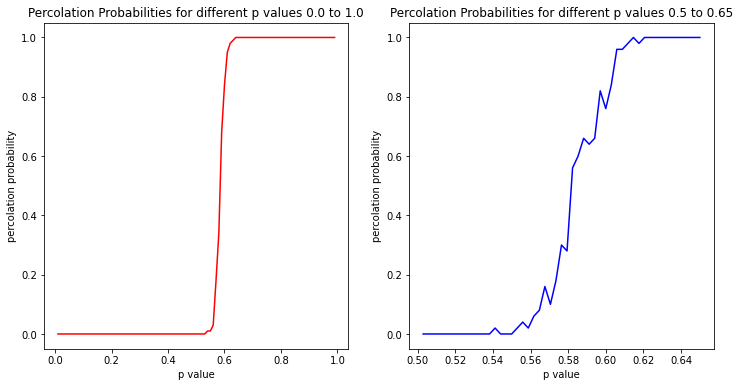

In [ ]:
#Percolation Probabilities for different p values

fig, axes = plt.subplots(1, 2,figsize=(12,6))
axes[0].set(title='Percolation Probabilities for different p values 0.0 to 1.0', xlabel='p value', ylabel='percolation probability')
axes[1].set(title='Percolation Probabilities for different p values 0.5 to 0.65', xlabel='p value', ylabel='percolation probability')

axes[0].plot(list(perc_prob_explore.keys()), list(perc_prob_explore.values()), color='red')
axes[1].plot(list(perc_prob_expand.keys()), list(perc_prob_expand.values()), color='blue')


print("Percolation Probabilities for different p values")

Average finite cluster sizes for different p values


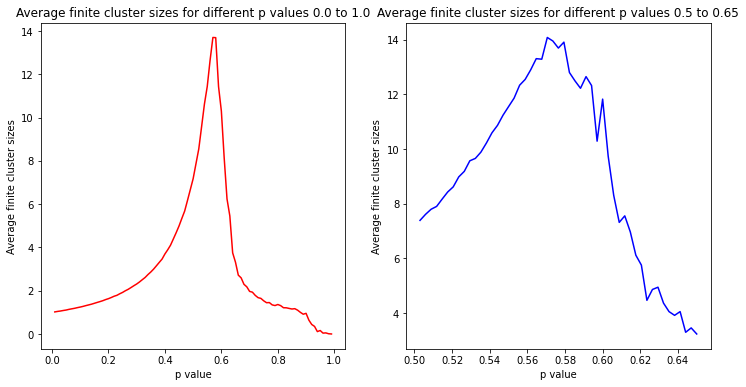

In [ ]:
#Average finite cluster sizes for different p values

fig, axes = plt.subplots(1, 2,figsize=(12,6))
axes[0].set(title='Average finite cluster sizes for different p values 0.0 to 1.0', xlabel='p value', ylabel='Average finite cluster sizes')
axes[1].set(title='Average finite cluster sizes for different p values 0.5 to 0.65', xlabel='p value', ylabel='Average finite cluster sizes')

axes[0].plot(list(average_cSize_explore.keys()), list(average_cSize_explore.values()), color='red')
axes[1].plot(list(average_cSize_expand.keys()), list(average_cSize_expand.values()), color='blue')


print("Average finite cluster sizes for different p values")

In [ ]:
import statistics

#In order to calculate p_inf parameter, one need to calculate the probability of
                                    #one element to be a member of the biggest cluster

#To do that in our experiment for every different p value, I will calculate the mean of the p_inf value's mean and std

#pExplore
p_inf_explore_mean = dict()
p_inf_explore_std = dict() 

#Create a data frame for every unique p value in the experiment
for p in exploreDf.p.unique():
  p_df = exploreDf[exploreDf.p == p]
  p_df.index = p_df['clusters'].str.len()
  total = p_df['clusters'].str.len().sum()
  p_df = p_df.sort_index(ascending=False).reset_index(drop=True)
  max_cluster = p_df['clusters'][0]
  std = []
  for cluster in p_df['clusters']:
    x = x+1
    max = -1
    size = 0
    for pebble in cluster:
      if len(pebble) > max:
        max = len(pebble)
      size = size + len(pebble)
    total = total + max/size
    std.append(max/size)

  p_inf_explore_mean[p] = statistics.mean(std)
  p_inf_explore_std[p] = statistics.stdev(std, xbar = statistics.mean(std))


  


Mean and std of P∞ for different p values


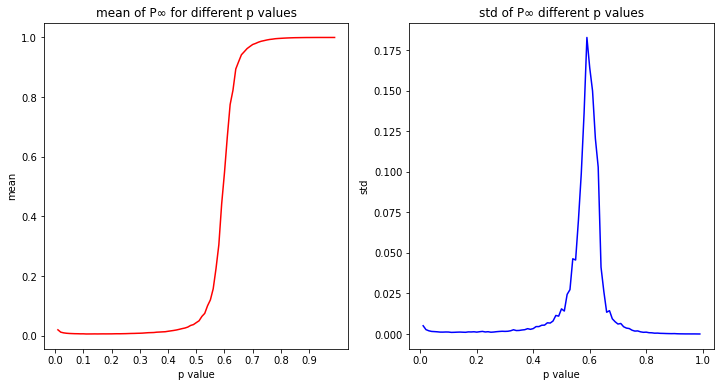

In [ ]:
#Average finite cluster sizes for different p values

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].set(title='mean of P∞ for different p values', xlabel='p value', ylabel='mean')
axes[1].set(title='std of P∞ different p values', xlabel='p value', ylabel='std')
axes[0].set_xticks(np.arange(0, 1, 0.1))
axes[0].plot(list(p_inf_explore_mean.keys()), list(p_inf_explore_mean.values()), color='red')
axes[1].plot(list(p_inf_explore_std.keys()), list(p_inf_explore_std.values()), color='blue')



print("Mean and std of P∞ for different p values")